In [ ]:
#Iris Data Set Attempt to Do Multi-Class Classification

In [18]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset=pd.read_csv('iris.data',header=None)

In [19]:
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
x=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4].values
print(type(x))

<class 'numpy.ndarray'>


In [21]:
#For Encoding the Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)
print(labelencoder_y.classes_)
print(labelencoder_y.get_params())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
{}


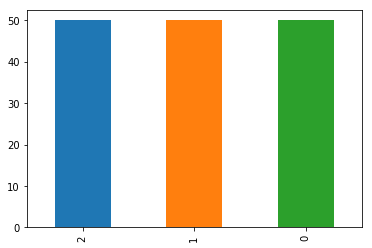

In [22]:
y_data=pd.DataFrame({'categories':y})
y_data['categories'].value_counts().plot.bar()

In [23]:
#Data Pre-Processing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

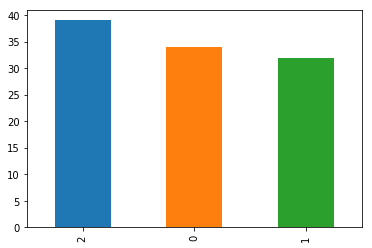

In [24]:
y_train_data=pd.DataFrame({'categories':y_train})
y_train_data['categories'].value_counts().plot.bar()

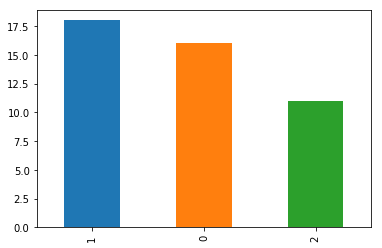

In [25]:
y_test_data=pd.DataFrame({'categories':y_test})
y_test_data['categories'].value_counts().plot.bar()

In [6]:
#Logistic Regression
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver='newton-cg',multi_class='multinomial')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix',cm)
print('Accuracy Score',accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report,f1_score
print('Classification Report \n',classification_report(y_test, y_pred))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Confusion Matrix [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy Score 97.77777777777777
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [7]:
#KNN Classifier
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix',cm)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is ',accuracy*100)
print(classification_report(y_test, y_pred))

Confusion Matrix [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy is  97.77777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
X_train.shape

In [26]:
#Aritifical Neural Network (ANN)
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
model= Sequential()
model.add(Dense(128, kernel_initializer='uniform',activation = 'relu', input_dim = 4))
model.add(Dense(64, kernel_initializer='uniform',activation = 'relu'))
model.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size =10,nb_epoch = 100)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="softmax", units=3)`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Use tf.cast instead.


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/100
105/105 [==============================] - 0s 5ms/step - loss: 1.0910 - acc: 0.6000
Epoch 2/100
105/105 [==============================] - 0s 152us/step - loss: 1.0517 - acc: 0.7619
Epoch 3/100
105/105 [==============================] - 0s 228us/step - loss: 0.9526 - acc: 0.7238
Epoch 4/100
105/105 [==============================] - 0s 152us/step - loss: 0.7509 - acc: 0.7238
Epoch 5/100
105/105 [==============================] - 0s 266us/step - loss: 0.5628 - acc: 0.7143
Epoch 6/100
105/105 [==============================] - 0s 304us/step - loss: 0.4614 - acc: 0.7143
Epoch 7/100
105/105 [==============================] - 0s 304us/step - loss: 0.4096 - acc: 0.7810
Epoch 8/100
105/105 [==============================] - 0s 261us/step - loss: 0.3698 - acc: 0.8476
Epoch 9/100
105/105 [==============================] - 0s 220us/step - loss: 0.3318 - acc: 0.8667
Epoch 10/100
105/105 [==============================] - 0s 304us/step - loss: 0.3103 - acc: 0.8667
Epoch 11/100
105/105 

105/105 [==============================] - 0s 114us/step - loss: 0.0210 - acc: 1.0000
Epoch 83/100
105/105 [==============================] - 0s 190us/step - loss: 0.0260 - acc: 0.9810
Epoch 84/100
105/105 [==============================] - 0s 152us/step - loss: 0.0197 - acc: 1.0000
Epoch 85/100
105/105 [==============================] - 0s 190us/step - loss: 0.0238 - acc: 1.0000
Epoch 86/100
105/105 [==============================] - 0s 190us/step - loss: 0.0192 - acc: 1.0000
Epoch 87/100
105/105 [==============================] - 0s 228us/step - loss: 0.0207 - acc: 1.0000
Epoch 88/100
105/105 [==============================] - 0s 190us/step - loss: 0.0187 - acc: 1.0000
Epoch 89/100
105/105 [==============================] - 0s 228us/step - loss: 0.0213 - acc: 1.0000
Epoch 90/100
105/105 [==============================] - 0s 190us/step - loss: 0.0196 - acc: 1.0000
Epoch 91/100
105/105 [==============================] - 0s 190us/step - loss: 0.0183 - acc: 1.0000
Epoch 92/100
105/105 [=

In [27]:
y_pred = model.predict_classes(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix',cm)
print('Accuracy Score',accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report,f1_score
print('Classification Report \n',classification_report(y_test, y_pred))

Confusion Matrix [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Accuracy Score 97.77777777777777
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [16]:
model.save('Iris-Ann 97.7 Accuracy.h5')

In [67]:
#Now we will try ANN aftter One hot encoding it
x=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4].values
print(type(x))
#For Encoding the Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)
print(labelencoder_y.classes_)
print(labelencoder_y.get_params())
print(y)

<class 'numpy.ndarray'>
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
{}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [68]:
#One-Hot Encoding y variable
y=y.reshape(150,1)
print(y.shape)
onehotencoder = OneHotEncoder(categories='auto')
y= onehotencoder.fit_transform(y).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(150, 1)


In [69]:
#Aritifical Neural Network (ANN)
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
model= Sequential()
model.add(Dense(32, kernel_initializer='uniform',activation = 'relu', input_dim = 4))
model.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size =10,nb_epoch = 100,verbose=1)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="softmax", units=3)`
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/100
105/105 [==============================] - 1s 7ms/step - loss: 1.0936 - acc: 0.5619
Epoch 2/100
105/105 [==============================] - 0s 161us/step - loss: 1.0778 - acc: 0.7429
Epoch 3/100
105/105 [==============================] - 0s 304us/step - loss: 1.0538 - acc: 0.7619
Epoch 4/100
105/105 [==============================] - 0s 285us/step - loss: 1.0103 - acc: 0.7619
Epoch 5/100
105/105 [==============================] - 0s 465us/step - loss: 0.9541 - acc: 0.7524
Epoch 6/100
105/105 [==============================] - 0s 275us/step - loss: 0.8867 - acc: 0.7524
Epoch 7/100
105/105 [==============================] - 0s 332us/step - loss: 0.8077 - acc: 0.7333
Epoch 8/100
105/105 [==============================] - 0s 256us/step - loss: 0.7345 - acc: 0.7238
Epoch 9/100
105/105 [==============================] - 0s 256us/step - loss: 0.6671 - acc: 0.7143
Epoch 10/100
105/105 [==============================] - 0s 276us/step - loss: 0.6131 - acc: 0.7143
Epoch 11/100
105/105 

In [70]:
y_pred = model.predict_classes(X_test)
print(y_pred)
y_pred = model.predict(X_test)
print(y_pred)
print(y_pred.shape)
#You can't use sklearn.metrics when y_pred is more than 1 column

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
[[1.1381799e-05 7.9482282e-03 9.9204034e-01]
 [4.4889218e-04 9.9147636e-01 8.0746636e-03]
 [9.9996269e-01 3.7336376e-05 3.7828418e-08]
 [1.5769598e-05 3.1107929e-02 9.6887636e-01]
 [9.9925584e-01 7.4358261e-04 5.4048542e-07]
 [1.0847480e-05 3.2911508e-03 9.9669802e-01]
 [9.9959153e-01 4.0816751e-04 4.1164114e-07]
 [5.0397352e-03 8.4861875e-01 1.4634147e-01]
 [1.2944156e-03 8.6446184e-01 1.3424376e-01]
 [4.5756083e-03 9.7172350e-01 2.3700872e-02]
 [2.6376278e-04 3.7111822e-01 6.2861800e-01]
 [1.1718893e-02 8.8170552e-01 1.0657563e-01]
 [2.9179861e-03 9.4781047e-01 4.9271461e-02]
 [1.7217094e-03 8.0034947e-01 1.9792877e-01]
 [3.7674885e-03 8.4855211e-01 1.4768031e-01]
 [9.9774325e-01 2.2557997e-03 9.3684156e-07]
 [4.2991303e-03 8.0116683e-01 1.9453397e-01]
 [2.5706198e-03 9.4468904e-01 5.2740391e-02]
 [9.9620759e-01 3.7896337e-03 2.7133754e-06]
 [9.9981862e-01 1.8114909e-04 2.4225969e-07]
 [1.418